# Cancer database

In this tutorial we will explore a dataset, create some plots so we can understand our data and finally create a machine learning pipeline. We picked the public breast cancer dataset, which contains patients with both malignant and bening cancer. Our objective is to classify the patients using the features (variables) provided.


Some content borrowed from:
- https://medium.com/@kathrynklarich/exploring-and-evaluating-ml-algorithms-with-the-wisconsin-breast-cancer-dataset-506194ed5a6a
- https://www.inertia7.com/projects/3


In [0]:
# For tree visualization, not really necessary
!pip install graphviz
!apt-get install graphviz

# Set to True to print the tree visualization
visualization = True

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 30 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,154 kB of

## Data exploration

In [0]:
import numpy as np
import pandas as pd # Data frames
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Fancy plots
from sklearn.datasets import load_breast_cancer

# Included to show all the columns
pd.set_option('display.max_columns', 500) 

### Load data from Breast Cancer database
We are now going to load the dataset with which we are going to work throughout this tutorial. The data was original provided by https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) and consists of 30 features: ten real-valued features computed for each cell nucleus and the mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image. The 10 computed featrures are:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)


The goal is to separate these two classes, which have been defined as follows:

* Label **0**: malignant
* Label **1**: benign

In [0]:
#load the dataset
cancer = load_breast_cancer()

#get the names of the labels
target_names = list(cancer.target_names)
print("labels:",target_names)

#get the names of the variables
feat_name = cancer.feature_names
print("features:", feat_name)

labels: ['malignant', 'benign']
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [0]:
# We create a dataframe with both features and labels so we can use some visualization tools from pandas
breast_cancer = pd.DataFrame(cancer.data, columns=feat_name)
breast_cancer['target'] = cancer.target
#Showing a few lines of the dataframe
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
print("Here's the dimensions of our data frame:\n", breast_cancer.shape)
print("\nHere's the data types of our columns:\n", breast_cancer.dtypes)

Here's the dimensions of our data frame:
 (569, 31)

Here's the data types of our columns:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float6

### Analyzing the data

In [0]:
# Generates descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset’s distribution, excluding NaN values.
breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


1    357
0    212
Name: target, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


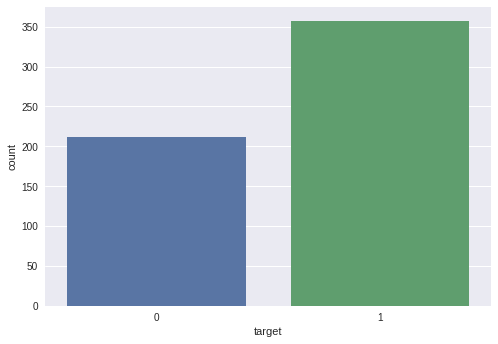

In [0]:
# Let's look at the count of the classes
print(breast_cancer['target'].value_counts())
sns.countplot(x='target', data=breast_cancer)

Below we plot a Scatterplot. A scatterplot takes 2 features and  plot them based on the labels (the different colors you see below)

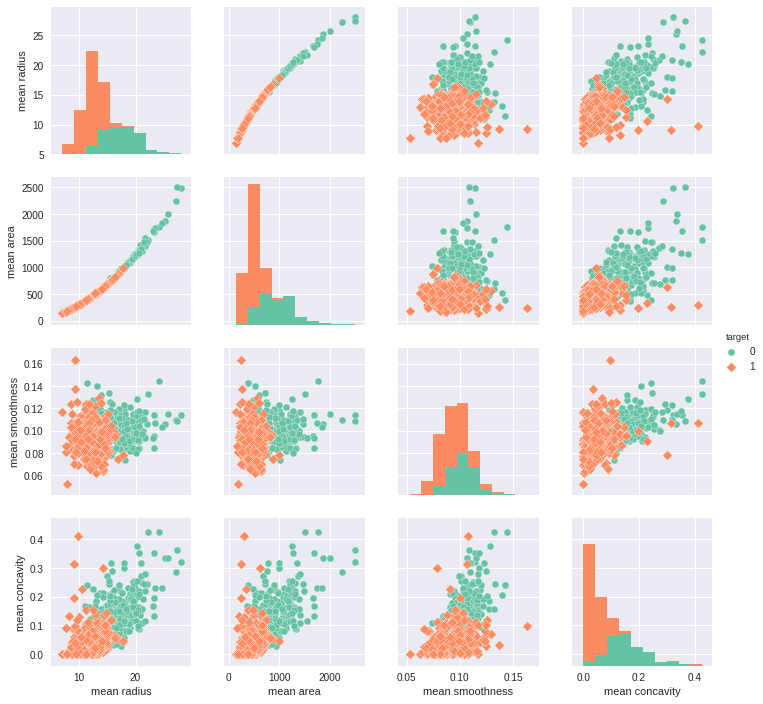

In [0]:
# Scatterplot Matrix
features = ['mean radius', 'mean area', 'mean smoothness', 'mean concavity']

sns.pairplot(breast_cancer, x_vars = features, y_vars = features,
             hue = 'target', palette='Set2', markers=["o", "D"])

In [0]:
# Let's check the pearson correlation between the features
breast_cancer.corr().round(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.0,0.3,1.0,1.0,0.2,0.5,0.7,0.8,0.1,-0.3,0.7,-0.1,0.7,0.7,-0.2,0.2,0.2,0.4,-0.1,-0.0,1.0,0.3,1.0,0.9,0.1,0.4,0.5,0.7,0.2,0.0,-0.7
mean texture,0.3,1.0,0.3,0.3,-0.0,0.2,0.3,0.3,0.1,-0.1,0.3,0.4,0.3,0.3,0.0,0.2,0.1,0.2,0.0,0.1,0.4,0.9,0.4,0.3,0.1,0.3,0.3,0.3,0.1,0.1,-0.4
mean perimeter,1.0,0.3,1.0,1.0,0.2,0.6,0.7,0.9,0.2,-0.3,0.7,-0.1,0.7,0.7,-0.2,0.3,0.2,0.4,-0.1,-0.0,1.0,0.3,1.0,0.9,0.2,0.5,0.6,0.8,0.2,0.1,-0.7
mean area,1.0,0.3,1.0,1.0,0.2,0.5,0.7,0.8,0.2,-0.3,0.7,-0.1,0.7,0.8,-0.2,0.2,0.2,0.4,-0.1,-0.0,1.0,0.3,1.0,1.0,0.1,0.4,0.5,0.7,0.1,0.0,-0.7
mean smoothness,0.2,-0.0,0.2,0.2,1.0,0.7,0.5,0.6,0.6,0.6,0.3,0.1,0.3,0.2,0.3,0.3,0.2,0.4,0.2,0.3,0.2,0.0,0.2,0.2,0.8,0.5,0.4,0.5,0.4,0.5,-0.4
mean compactness,0.5,0.2,0.6,0.5,0.7,1.0,0.9,0.8,0.6,0.6,0.5,0.0,0.5,0.5,0.1,0.7,0.6,0.6,0.2,0.5,0.5,0.2,0.6,0.5,0.6,0.9,0.8,0.8,0.5,0.7,-0.6
mean concavity,0.7,0.3,0.7,0.7,0.5,0.9,1.0,0.9,0.5,0.3,0.6,0.1,0.7,0.6,0.1,0.7,0.7,0.7,0.2,0.4,0.7,0.3,0.7,0.7,0.4,0.8,0.9,0.9,0.4,0.5,-0.7
mean concave points,0.8,0.3,0.9,0.8,0.6,0.8,0.9,1.0,0.5,0.2,0.7,0.0,0.7,0.7,0.0,0.5,0.4,0.6,0.1,0.3,0.8,0.3,0.9,0.8,0.5,0.7,0.8,0.9,0.4,0.4,-0.8
mean symmetry,0.1,0.1,0.2,0.2,0.6,0.6,0.5,0.5,1.0,0.5,0.3,0.1,0.3,0.2,0.2,0.4,0.3,0.4,0.4,0.3,0.2,0.1,0.2,0.2,0.4,0.5,0.4,0.4,0.7,0.4,-0.3
mean fractal dimension,-0.3,-0.1,-0.3,-0.3,0.6,0.6,0.3,0.2,0.5,1.0,0.0,0.2,0.0,-0.1,0.4,0.6,0.4,0.3,0.3,0.7,-0.3,-0.1,-0.2,-0.2,0.5,0.5,0.3,0.2,0.3,0.8,0.0


In [0]:
#You might want to drop variables that are too correlated
#breast_cancer=breast_cancer.drop(['mean perimeter'],axis=1)
#Is this a good choice?

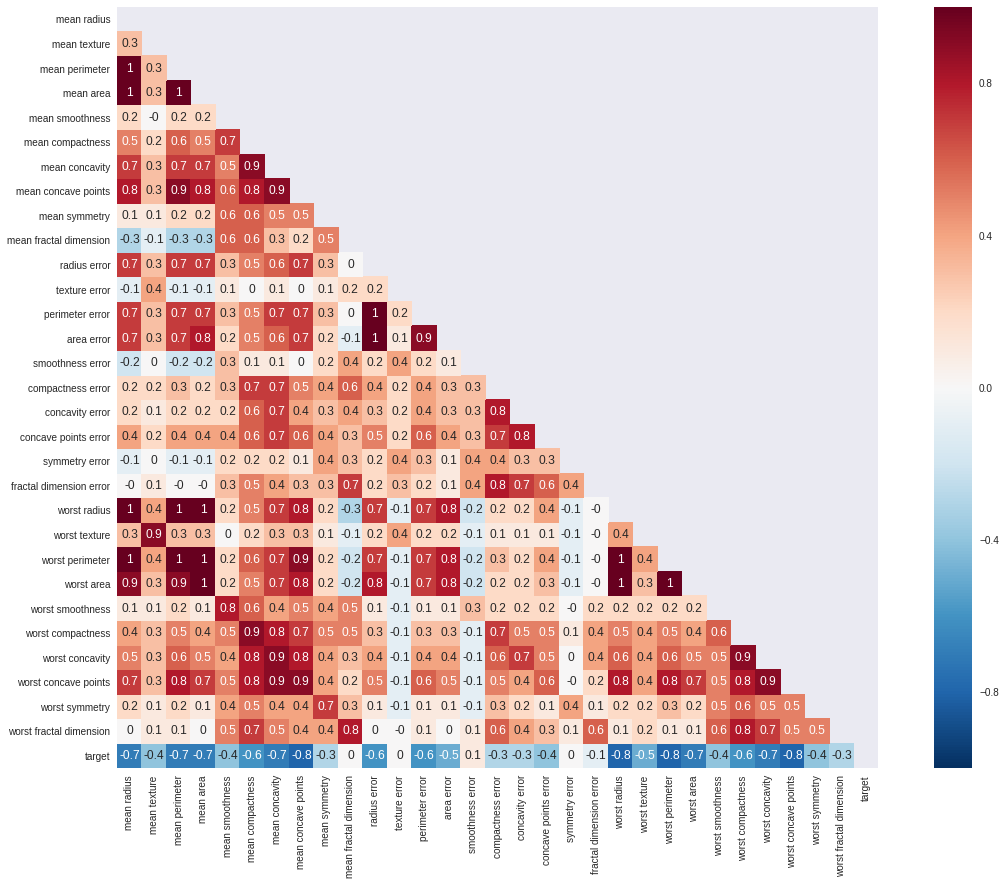

In [0]:
# Let's make it a little bit more readable now
#correlation matrix and rounding to 1 decimal
corr = breast_cancer.corr().round(1)
mask = np.zeros_like(corr)
#Keeps only half of the correlation matrix
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20,14))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="RdBu_r")





## Normalization
For many ML methods normalization is a key component. It can help the method converge quicker and prevent biased results.
Below we implement the min max normalization, but others can be found in the literature.

In [0]:
def normalize_df(frame):
    '''
    Normalize all data to [0-1] for visualization purpose
    Min Max normalization
    
    '''
   
    breast_cancer_norm = pd.DataFrame()
    for item in frame:
        if item in frame.select_dtypes(include=[np.float]):
            breast_cancer_norm[item] = ((frame[item] - frame[item].min()) / 
            (frame[item].max() - frame[item].min()))
        else: 
            breast_cancer_norm[item] = frame[item]
    return breast_cancer_norm

breast_cancer_norm = normalize_df(breast_cancer)

###And if you have outliers?

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


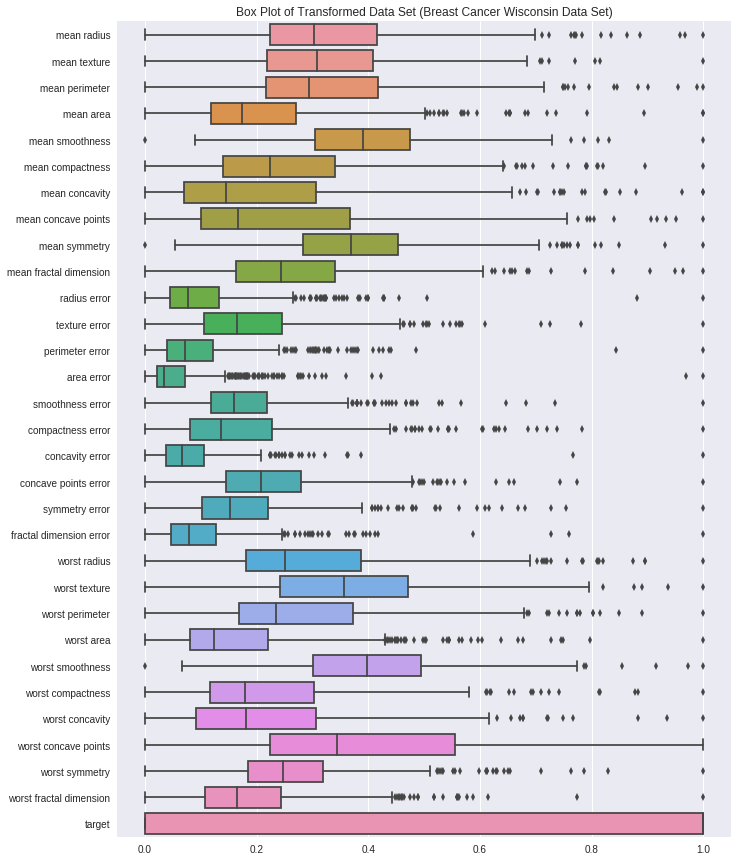

In [0]:
f, ax = plt.subplots(figsize=(11, 15))
plt.title("Box Plot of Transformed Data Set (Breast Cancer Wisconsin Data Set)")
ax = sns.boxplot(data=breast_cancer_norm, orient='h')

# Machine learning

Now that we are done exploring the data, we know that:

* We don't have any missing values
* We know that some variables are correlated and probably won't add much to the models
* We know that our labels are a bit imbalanced
* We can probably solve this with a linear classifier (Scatter Plot)

In [0]:
# Let's check if it's everything okay with the data
breast_cancer_norm.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Still using the dataset without normalization data 
X = breast_cancer[feat_name] #in ML we often call our features X
y = breast_cancer['target'] # and our label y

# Split training and testing data. The testing data must be untouched until the model evaluation
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples: ", X_train.shape)
print("Testing samples: ", X_test.shape)

# Many things are already implemented in some libraries, like normalization shown below.
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Training samples:  (455, 30)
Testing samples:  (114, 30)


#Learning Curve

A learning curve is an important visualization tool for creating models. It allows you too prevent overfitting/underfitting and check generalization.

It is a plot of training and validation error (y axis) over an increasing number of samples (x axis).

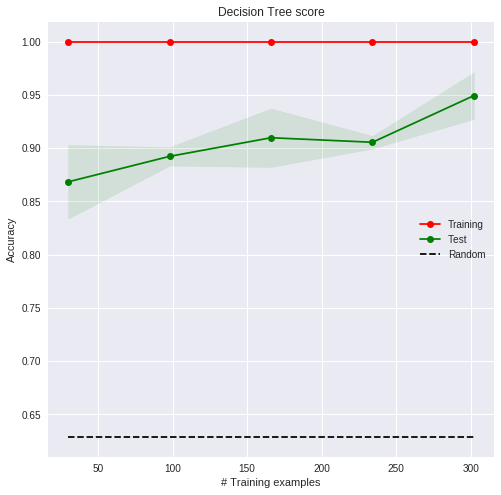

In [0]:
from sklearn.model_selection import learning_curve
from sklearn import tree
import sklearn

# Get training curves
train_sizes, train_scores, test_scores =\
    sklearn.model_selection.learning_curve(tree.DecisionTreeClassifier(), X_train_std,
                                           y_train, scoring='accuracy')

# random classification
nb_labels_class = np.bincount(np.array(y_train).astype(int))
F1_random = nb_labels_class[1]/y_train.size # random classification

plt.figure(figsize=(8,8))
plt.title("Decision Tree score")
plt.xlabel("# Training examples")
plt.ylabel("Accuracy")

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, np.ones(train_sizes.size) * F1_random, '--k', label = 'Random')

plt.legend()
plt.show()

###The model above is clearly overfiting. 

Decision Trees have many parameters that need tunning before they start performing properly.

Therefore let's focus on a different method. Can you adapt the code above for a Support Vector Machine? SVM?

http://scikit-learn.org/stable/modules/svm.html

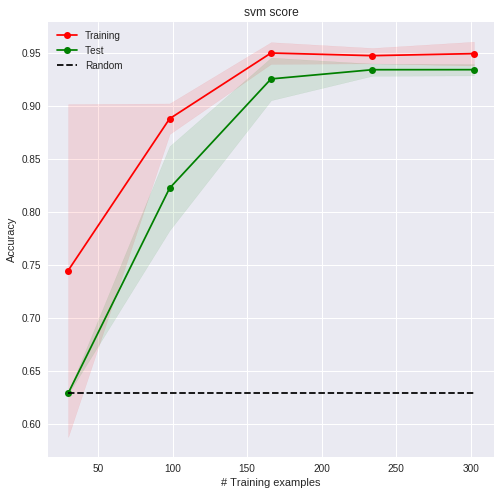

In [0]:
#Adapted code
from sklearn.model_selection import learning_curve
from sklearn import tree,svm
import sklearn

# Get training curves
train_sizes, train_scores, test_scores =\
    sklearn.model_selection.learning_curve(svm.SVC(C=0.1), X_train_std,
                                           y_train, scoring='accuracy')

# random classification
nb_labels_class = np.bincount(np.array(y_train).astype(int))
F1_random = nb_labels_class[1]/y_train.size # random classification

plt.figure(figsize=(8,8))
plt.title("svm score")
plt.xlabel("# Training examples")
plt.ylabel("Accuracy")

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, np.ones(train_sizes.size) * F1_random, '--k', label = 'Random')

plt.legend()
plt.show()

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train_std, y_train)
pred = clf1.predict(X_train_std)

# Compute accuracy based on training samples
acc = accuracy_score(y_train, pred)

print('Accuracy on train:', round(acc, 2))


Accuracy on train: 1.0


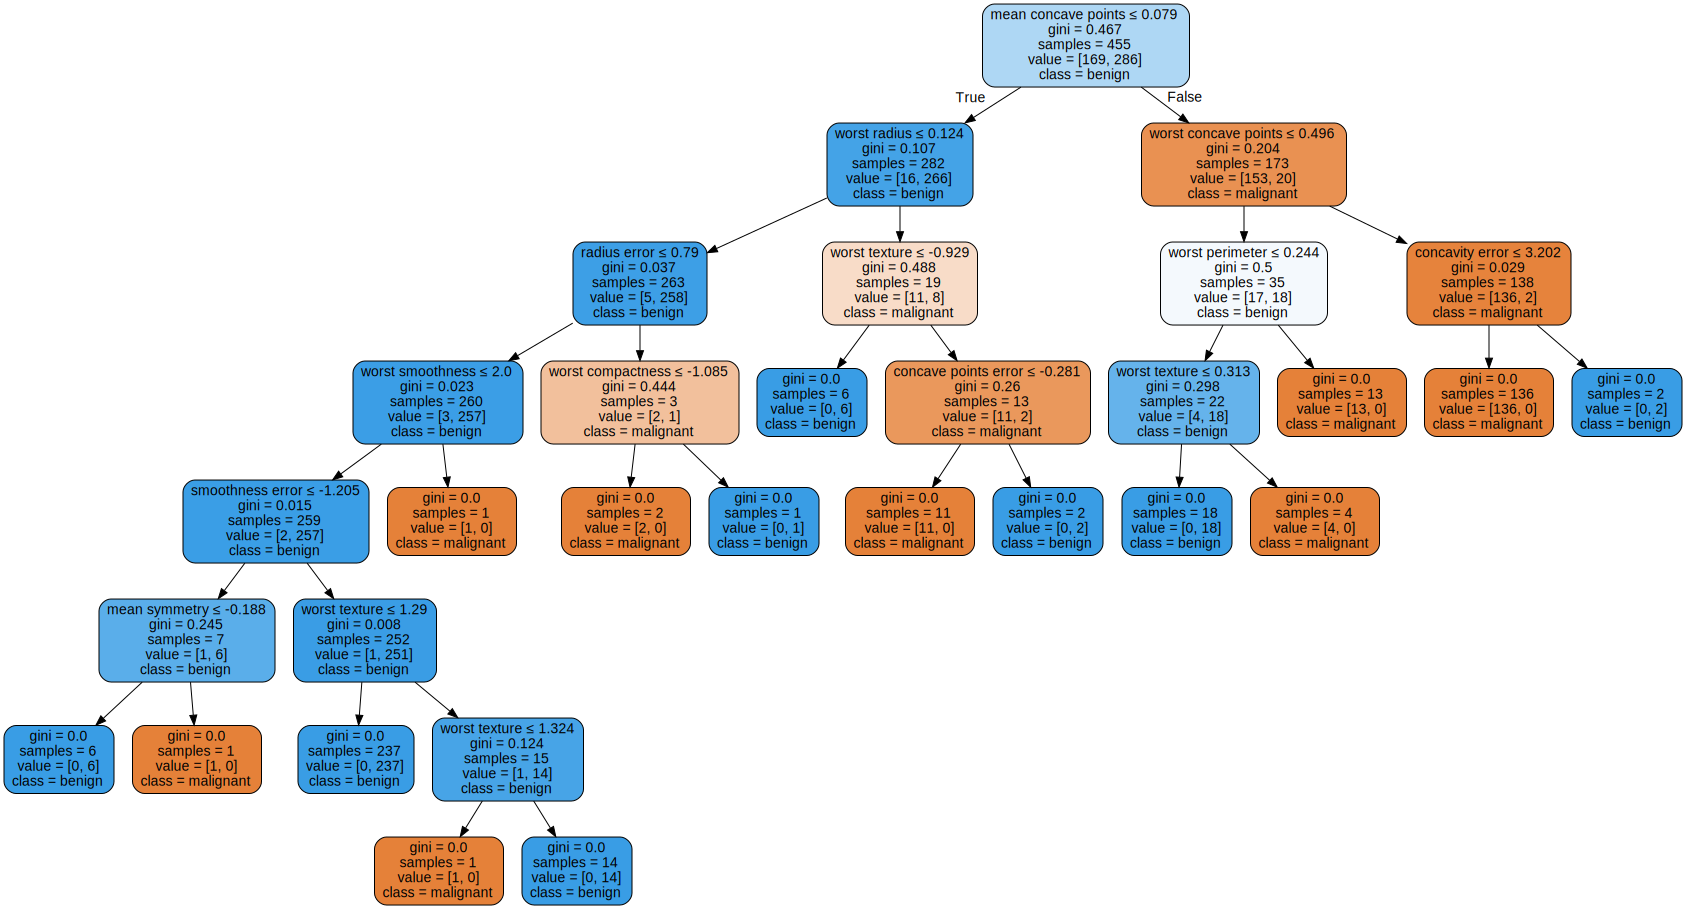

In [0]:
# Let's try to understand our tree classifier

graph = ""
if visualization:
    import graphviz 
    dot_data = tree.export_graphviz(clf1, out_file=None) 
    graph = graphviz.Source(dot_data) 
    graph.render("Cancer") 
    dot_data = tree.export_graphviz(clf1, out_file=None, 
                             feature_names=feat_name,  
                             class_names=target_names,
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = graphviz.Source(dot_data)  
graph

In [0]:
from sklearn.feature_selection import SelectKBest

# We have a lot of features, but I'm not sure if we really need them all.
# Let's try to select the k-best features for this problem
k_best = SelectKBest(k=5)
k_best = k_best.fit(X_train_std, y_train)
X_new_kbest = k_best.transform(X_train_std)

mask = k_best.get_support()
new_features = breast_cancer[feat_name].columns[mask]
print("Most important features: ", new_features)

clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X_new_kbest, y_train)

# Compute accuracy based on training samples
pred = clf2.predict(X_new_kbest)
acc = accuracy_score(y_train, pred)
print('Accuracy on test:', round(acc, 2))

Most important features:  Index(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'],
      dtype='object')
Accuracy on test: 1.0


### Testing the model

In [0]:
# Let's test our model
pred1 = clf1.predict(X_test_std)
pred2 = clf2.predict(X_test_std[:,mask])

# Compute accuracy based on test samples
acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)

#auc_val = roc_auc_score(y_test, pred1)
#f1_val = f1_score(y_test, pred1)

#print('AUC on test:\t\t', round(auc_val, 2))
#print('F1 score on test:\t\t', round(f1_val, 2))

print('Accuracy on test using all features:\t', round(acc1, 2))
print('Accuracy on test using 5 best features:\t', round(acc2, 2))


Accuracy on test using all features:	 0.93
Accuracy on test using 5 best features:	 0.94


# Creating a pipeline

So far we've explored the data, selected the best features, trained and tested a classifier. But we only did this once and did not optimize the values for some of our choices, for instance, the K-best features. Also what if we were just lucky with our testing set and it contains a lot of easy samples or maybe most samples are from one single class?
Below we'll create a pipeline that will do everything above, but multiple times for multiple train and test splits.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# functions for the pipeline
def Feature_Selection_CV(x, y,n_splits):
    # Returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.
    skf = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.20, random_state=1)

    # Empty array to save the k_best
    k_best_array = np.zeros((n_splits,x.shape[1]))
    
    
    # enumerate allows us to loop through a list of values and keep a control variable at the same time
    for i, (train, val) in enumerate(skf.split(x, y)): 
        x_train = x[train]
        y_train = y[train]
        x_val = x[val]
        y_val = y[val]

        best_auc=0
        for k in range(1,x_train.shape[1]+1):
            k_best = SelectKBest(k=k)
            x_new_train = k_best.fit_transform(x_train, y_train)
            x_new_val = k_best.transform(x_val)
            clf=LogisticRegression()
            clf=clf.fit(x_new_train,y_train)
            pred=clf.predict(x_new_val)
            k_best_array[i,k-1]=roc_auc_score(y_val,pred)
            
            # TODO: select k number of features
            # TODO: test the accuracy on these features, use the validation data
            # TODO: save k if it is the best

    #TODO: return the best K for each dataset split
    return(np.mean(k_best_array,axis=0))


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

X = np.array(breast_cancer[feat_name]) #in ML we often call our features X
y = np.array(breast_cancer['target']) # and our label y

# Number of splits
splits = 10

# Dataset is imbalanced, so lets take that into account
skf = StratifiedShuffleSplit(n_splits=splits, test_size=0.20, random_state=1)

# here you'll save the accuracy for each iteration
acc_vals = np.zeros(splits)

#We'll use this for loop first for feature selection
# enumerate allows us to loop through a list of values and keep a control variable at the same time

#variable to save the AUC for all variables for all cross-validation iterations
feature_eval=np.zeros((splits,X.shape[1]))

for i, (train, test) in enumerate(skf.split(X, y)): 
    #get the train and test sets
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    #TODO: Standardize your data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # feature selection using the training set
    feature_eval[i,:] = Feature_Selection_CV(x_train, y_train,n_splits=3)
    #print(K)

# K has multiple values, how should we deal with it? are they totally different? maybe average or mode?
# Below we average the features and get find the value with the best AUC
final_feats=np.mean(feature_eval,axis=0)
print("Best Average AUC:",np.max(final_feats))
print("Best Number of Features",np.argmax(final_feats)+1) #we add one because arrays start at 0 but we cannote create a model with 0 features

print("Worse AUC %.2f and Number of features: %d"%(np.min(final_feats),np.argmin(final_feats)))




Best Average AUC: 0.9739508083935329
Best Number of Features 23
Worse AUC 0.90 and Number of features: 0


In [0]:
#Now we have found the magical K number of features, but are they always the same?
#If one of the training sets is "weird" maybe we could have a different set of features
#Models created with different feature combinations are not comparable therefore we check that below as well.
mask=np.zeros((splits,X.shape[1]))

for i, (train, test) in enumerate(skf.split(X, y)): 
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
        
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    k_best = SelectKBest(k=23) #the magical number we found
        
    x_new_train = k_best.fit_transform(x_train, y_train)
        
    mask[i,:]=k_best.get_support()
                                  
print(np.sum(mask,axis=0))      

#In our results we see that all variables that were selected were indeed included in every iteration, therefore we can start creating our models.

#You can also select this variables from the dataset now.

X=X[:,np.sum(mask,axis=0)==splits]

print(X.shape)



[10. 10. 10. 10. 10. 10. 10. 10. 10.  0. 10.  0. 10. 10.  0.  0.  0. 10.
  0.  0. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
(569, 23)


#The Final Pipeline

You have a dataset with only the best features, now it is time to predict.

Add a few classifiers and start predicting.

Don't forget, they have hyper-parameters that need to be optimized (as shown below) and it all needs to be in cross-validation pipeline.

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

# Supress convergence warning
warnings.filterwarnings("ignore")

# Split training and testing data
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=42)

# Some classifiers can't converge if data isn't normalized
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Define cross-validation
cv_strat = StratifiedShuffleSplit(n_splits=3, test_size=0.20, random_state=1)

print("All set!")

All set!


In [0]:
# Initialize grid of hyperparameters and models to optimize
# Logstic Regression
lr_param = {
    'C': [0.1, 1, 10],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}
lr_clf = LogisticRegression()

# Support Vector Machines
svc_param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'sigmoid'],
    'degree': [1, 2, 3],
    'gamma': [0.1, 1]
}
svc_clf = SVC()

# Random Forest
rfc_param = {
    'n_estimators': [10, 20, 30],
    'max_features': [None, 'auto'],
    'max_depth': [None, 5],
    'min_samples_leaf': [2, 5, 10]
}
rfc_clf = RandomForestClassifier()

print("All set!")

All set!


In [0]:
print("Optimizing:\t", "Logistic Regression")
grid_lr = GridSearchCV(lr_clf, lr_param, cv=3, scoring='accuracy',\
                       n_jobs=-1, verbose=1)
grid_lr.fit(X_train_std, y_train)
print("Best params:\t", grid_lr.best_params_)
print('CV Accuracy:\t', round(grid_lr.best_score_, 2))
opt_lr = grid_lr.best_estimator_

# Compute accuracy based on testing samples
pred = opt_lr.predict(X_test_std)
lr_acc = accuracy_score(y_test, pred)
print('Test accuracy:\t', round(lr_acc, 2))

Optimizing:	 Logistic Regression
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params:	 {'C': 0.1, 'solver': 'liblinear'}
CV Accuracy:	 0.97
Test accuracy:	 0.98


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished


In [0]:
print("\nOptimizing:\t", "Support Vector Machines")
grid_svc = GridSearchCV(svc_clf, svc_param, cv=cv_strat, scoring='accuracy',\
                        n_jobs=-1, verbose=1)
grid_svc.fit(X_train_std, y_train)
print("Best params:\t", grid_svc.best_params_)
print('CV Accuracy:\t', round(grid_svc.best_score_, 2))
opt_svc = grid_svc.best_estimator_

# Compute accuracy based on testing samples
pred = opt_svc.predict(X_test_std)
svc_acc = accuracy_score(y_test, pred)
print('Test accuracy:\t', round(svc_acc, 2))


Optimizing:	 Support Vector Machines
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best params:	 {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}
CV Accuracy:	 0.97
Test accuracy:	 0.98


[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    0.8s finished


In [0]:
print("\nOptimizing:\t", "Random Forest")
grid_rfc = GridSearchCV(rfc_clf, rfc_param, cv=cv_strat, scoring='accuracy',\
                        n_jobs=-1, verbose=1)
grid_rfc.fit(X_train_std, y_train)
print("Best params:\t", grid_rfc.best_params_)
print('CV Accuracy:\t', round(grid_rfc.best_score_, 2))
opt_rfc = grid_rfc.best_estimator_

# Compute accuracy based on testing samples
pred = opt_rfc.predict(X_test_std)
rfc_acc = accuracy_score(y_test, pred)
print('Test accuracy:\t', round(rfc_acc, 2))


Optimizing:	 Random Forest
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best params:	 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 20}
CV Accuracy:	 0.96
Test accuracy:	 0.96


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.8s finished


##So far your pipeline does the following:

1 - Splits the data into traning and testing

2 - Normalizes

3 - Selects the best features by splitting the traning into traning and validation (using CV)

4 - Creates a classifier using the best features

5- Optimizes its hyper-parameters

6 - Tests the classifier



##Issues:

1 - [DONE] Every iteration we might have a different K best features, it is hard to compare the models like this, it would be better to run this multiple times and see which features are selected most often.

2 - [DONE] Our classifiers have many hyper-parameters that we are not using, we need to do some gridsearch/randomgridsearch to optimize these parameters. Remember, use only the training data: http://scikit-learn.org/stable/modules/grid_search.html

3- [ DONE]Accuracy might not be a good measure for unbalanced data. You can try to use the f1_score or the ROC curve to evaluate your model
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

4 - All variables are continuous, but what if you have categorical variables?

5- The last part (hyper-parameter tuning and model creation) runs only once. Therefore, again we could have a lucky train and test split, so we should run that multiple times. Can you adapt that into a for loop so you can compute the best hype-parameters for 10 different training sets and test on 10 different testing sets? Remember to store in a variable:
 * The best parameters for each model for each training set
 * The AUC value for each testing set

6 - Finally, compute the average AUC result, see if the hyper-parameters are usually the same, maybe you can create a final model for each classifier? 

7 - Plot your results. You can always add AUC and CI to a table, but it is nice to plot your results nicely, so go ahead and add an mean ROC ([Example Here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html)), and feature importance from the Random Forest [[Example Here](https://www.kaggle.com/grfiv4/plotting-feature-importances)]

